In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
# load data
player_data_url <- "https://www.dropbox.com/scl/fi/q73bfuafs2iasichsn736/players.csv?rlkey=xjsen4ho5dcb37m197u57neal&st=fvpz66cq&dl=1"
session_data_url = "https://www.dropbox.com/scl/fi/t6950eniqg71pxxwelyju/sessions.csv?rlkey=uj9mpdttf453ncujhj3yauymh&st=n53xekat&dl=1"

player_data <- read_csv(player_data_url)
session_data <- read_csv(session_data_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# Data Description For player.csv (player_data)

# number of observations
nrow(player_data) #196 obs

# number of variables, name and type of variables, what the variables mean,
head(player_data)

#summary statistics
summary(player_data)

player_data |>
  summarize(sd_Age = sd(Age, na.rm = TRUE))
player_data |>
  summarize(sd_played_hours = sd(played_hours))

# frequency tables
table(player_data$subscribe)
table(player_data$gender)
table(player_data$experience)

[1] 196

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

sd_Age
<dbl>
7.389687


sd_played_hours
<dbl>
28.35734



FALSE  TRUE 
   52   144 


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

**Data description for player.csv (player_data)**
- Includes 196 observations, which means 196 unique players played on this Minecraft Server (PLAICraft)
- Data was probably collected from the platform's database and not from a survery/manual entry since it includes total hours played which is most likely  automatically logged. The user provided entries most likely came from when they signed up.
- Includes 7 variables:
    1. `experience` (type **character**, one of):
        - Information on that player's experience playing Minecraft
            - 'Beginner'
            - 'Amateur'
            - 'Regular'
            - 'Veteran'
            - 'Pro'
    2. `subscribe` (type **logical**, one of):
      - Whether or not that player is subscribed
          - TRUE
          - FALSE
    3. `hashedEmail` (type **character**):
        - Represents the player's hashed email
    4. `played_hours` (type **numeric (double)**):
        - Represents the player's total played hours on the server
    5. `name` (type **character**):
        - Represents the player's name
    6. `gender` (type **character**, one of):
        - Represents the player's gender
            - 'Male'
            - 'Female'
            - 'Non-binary'
            - 'Prefer not to say'
            - 'Agender'
            - 'Two-Spirited'
            - 'Other'
    7. `Age` (type **numeric (double)**):
        - Represents the player's age
- Summary Statistics:
    - `Age` ranges from 9.00 to 58.00 years (mean = 21.14, median = 19.00, standard deviation = 7.39)
    - `played_hours` ranges from 0.00 to 223.10 hours (mean = 5.85, median = 0.10, standard deviation = 28.36)
    - Majority of the player's `gender` are 'Male' (124 out of 196)
    - Majority of the players's `experience` are 'Amateur' (63 players)
    - Majority of the players are subscribed (144 out of 196)
- Issues identified about the dataset:
    - There are 2 missing values in `Age`
    - It is not known if it includes every player in a population or just a sample //MAYBE NOT INCLUDE

In [4]:
# Data Description For sessions.csv (session_data)

# number of observations
nrow(session_data) #1535 obs

# number of variables, name and type of variables, what the variables mean,
head(session_data)

#summary statistics
summary(session_data)

session_data |>
  summarize(sd_original_start_time = sd(original_start_time))
session_data |>
  summarize(sd_played_hours = sd(original_end_time, na.rm = TRUE))

[1] 1535

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

sd_original_start_time
<dbl>
3557491589


sd_played_hours
<dbl>
3552813134


**Data description for sessions.csv (session_data)**
- Includes 1535 observations, which means 1535 individual play sessions on this Minecraft Server (PLAICraft)
- Data was probably collected automatically from the server's log since it tracked the player's start and end time
- Includes 5 variables:
    1. `hashedEmail` (type **character**):
        - Represents the player's hashed email
    2. `start_time` (type **character**):
        - Start timestamp of the game session, format: DD/MM/YYYY HH:MM
    3. `end_time` (type **character**):
        - Start timestamp of the game session, format: DD/MM/YYYY HH:MM
    4. `original_start_time` (type **numeric (double)**):
        - Represents the unix epoch timestamp for start_time
    5. `original_end_time` (type **numeric (double)**):
        - Represents the unix epoch timestamp for end_time
- Summary Statistics:
    - `start_time` and `end_time` ranges from April to September 2024
        - unix time ranges from (1.71e+12 to 1.73e+12)
        - `start_time`: mean = 1.72e+12, median = 1.719e+12, standard deviation = 3.56e+09
        - `end_time`: mean = 1.72e+12, median = 1.719e+12, standard deviation = 3.55e+09
- Issues identified about the dataset:
    - There are 2 missing values in `end_time` and `original_end_time`
    - for the `original_start_time` and `original_end_time` I think the data should include all digits instead of the e12 etc
    - It is not known:
        - how the data were collected
        - if it includes every player in a population or just a sample
  

**Questions:**

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

My Question: Can the player's experience, gender, age, and played hours predict whether the player will `subscribe` in the player_data dataset?

This dataset (player_data) contains many variables (player's experience, gender, age, and played hours) that can be used to predict a player's subscription status. Additionally, these variables provide predictor features (`experience`, `gender`, `Age`, `played_hours`) and target variable (`subscribe`) which means it can be used to build a classification model.

Plan for wrangling data:
- Since I only need `experience`, `gender`, `Age`, `played_hours`, `subscribe` variables, I can remove irrelevant variables (`name`, `hashedEmail`)
- Handle the missing values in `Age`
- Standardize ...

After cleaning the data, I can apply a classification method to predict `subscribe` based off the player's demographic features.


**Exploratory Data Analysis and Visualization**



experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


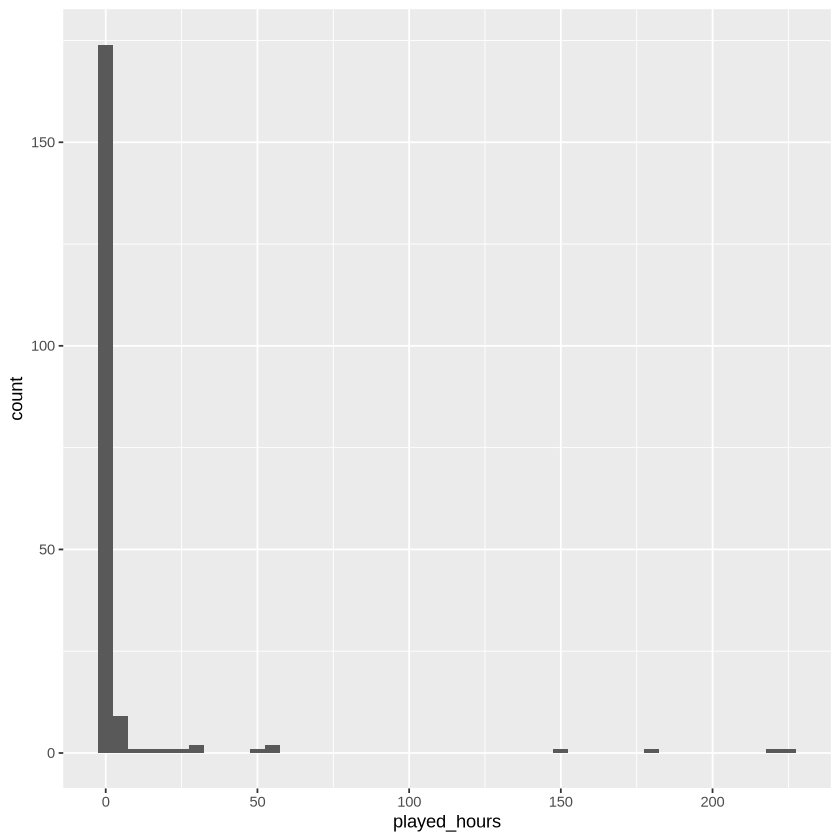

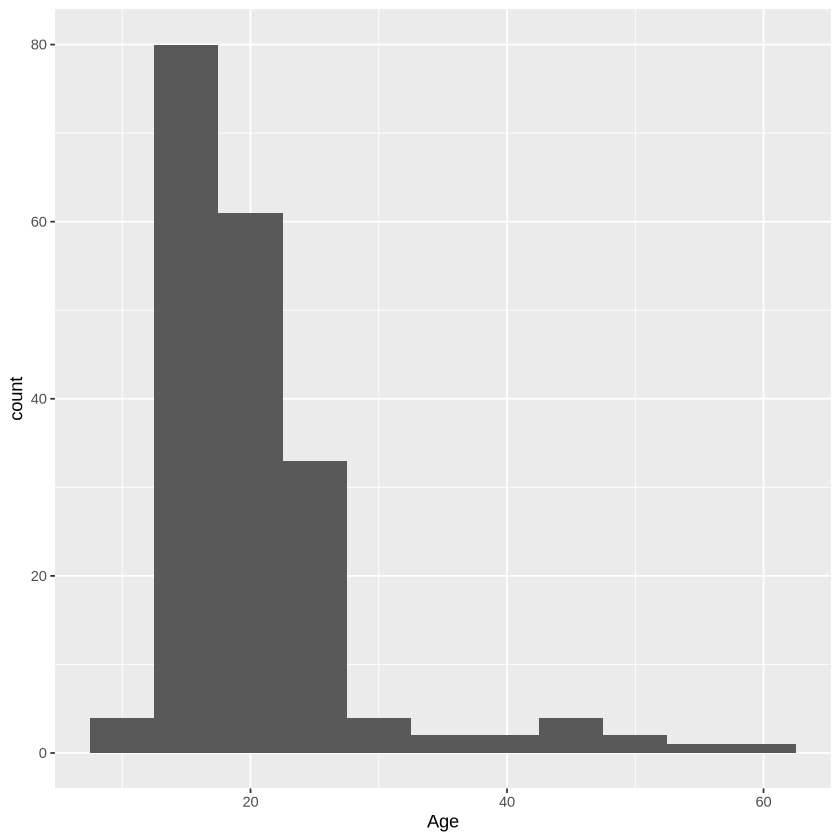

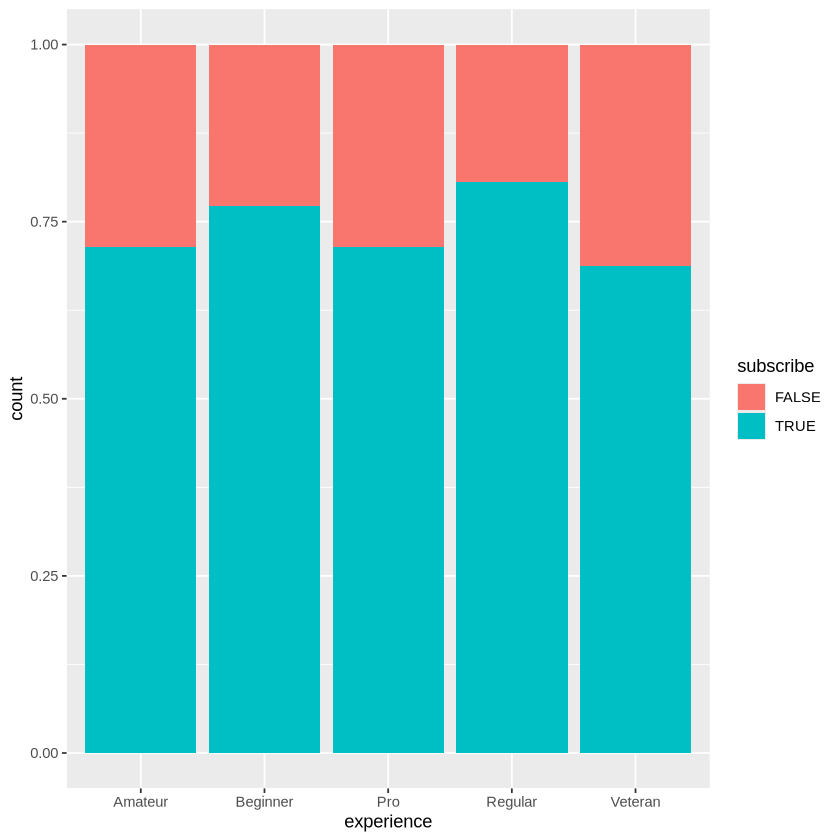

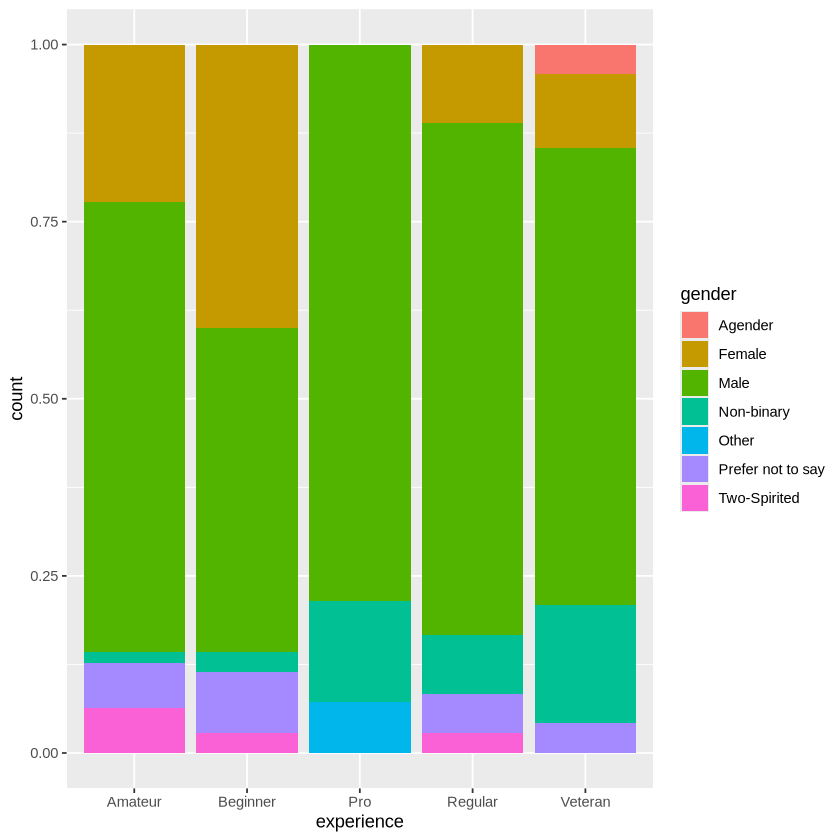

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


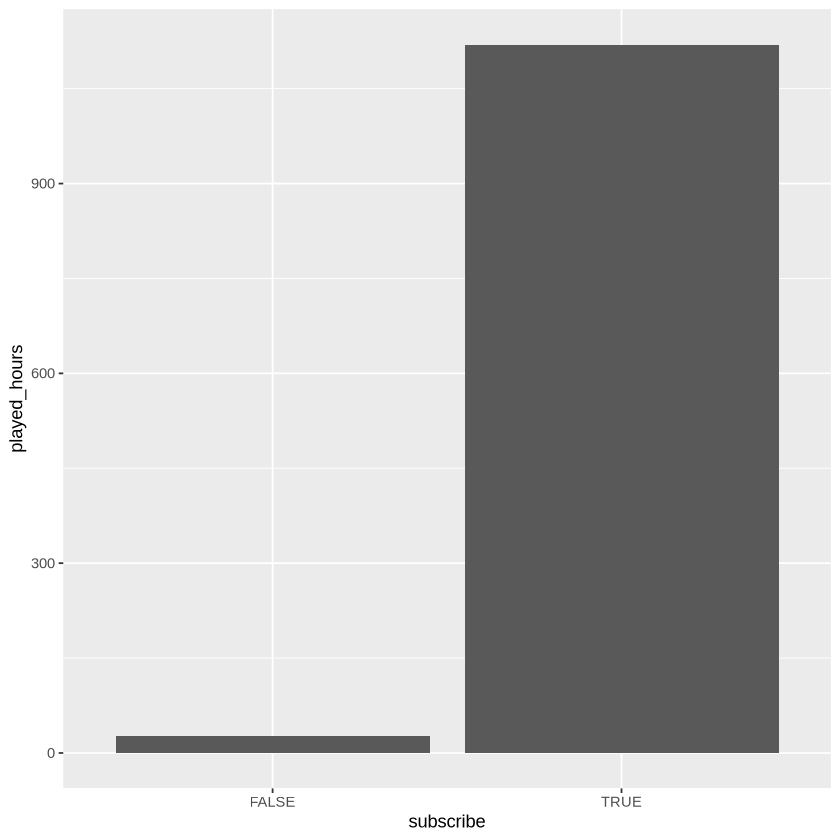

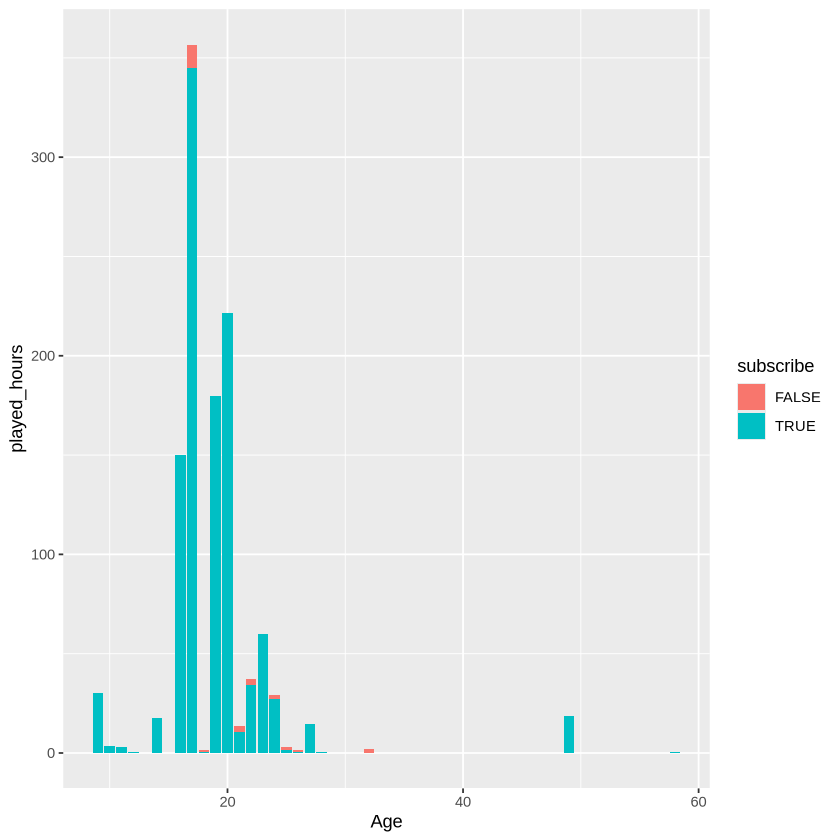

In [34]:
head(player_data)
head(session_data)

player_mean <- player_data |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
player_mean
# Age distribution
player_data |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 5)
# Played hours distribution
player_data |>
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 5)
# Subscription rate by experience
player_data |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill")
# Subscription rate by gender
player_data |>
    ggplot(aes(x = experience, fill = gender)) +
    geom_bar(position = "fill")
# played hours vs subscription
player_data |>
    ggplot(aes(x = subscribe, y = played_hours)) +
    geom_bar(stat = "identity")
# Age vs played_hours
player_data |>
    ggplot(aes(x = Age, y = played_hours, fill = subscribe)) +
    geom_histogram(stat = "identity")
